In [177]:
import requests
import simplejson
import json
import re
import operator
import sys
from urllib.request import urlopen
import os
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as matplt
%matplotlib inline  

In [237]:
#Change company_name to the one's whose stocks you want to predict
company_name = "facebook"

In [238]:
yahoo_stock_code="http://d.yimg.com/autoc.finance.yahoo.com/autoc?query="
yahoo_excess_code="&region=1&lang=en"
stock_url=yahoo_stock_code+company_name+yahoo_excess_code
response=requests.get(stock_url)

In [239]:
data=simplejson.loads(response.content.decode("utf-8"))
code=data['ResultSet']['Result'][0]['symbol']
print(code)

FB


In [240]:
API_KEY = "get your own from https://www.alphavantage.co/"
base_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="
dataset_url=base_url+code+"&outputsize=full&apikey="+API_KEY+"&datatype=csv"

In [241]:
output_path=code+".csv"

In [242]:
response = requests.get(dataset_url)
with open(output_path, 'wb') as f:
    f.write(response.content)

In [243]:
date=[]
price=[]
with open(output_path) as datasource:
	r=csv.reader(datasource)
	next(r)
	for row in r:
		date.append(int(row[0].split('-')[0]))
		price.append(float(row[1]))

In [244]:
date=np.reshape(date,(len(date),1))

In [245]:
svr_rbf1=SVR(kernel='rbf',gamma=0.1)

In [246]:
svr_rbf1.fit(date,price)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [247]:
svr_rbf1.predict(7)[0]

93.370449055368482

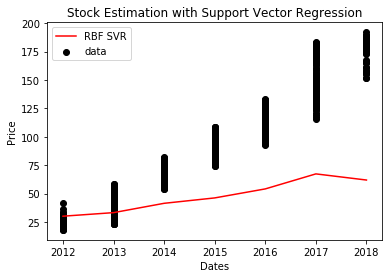

In [248]:
matplt.scatter(date,price,color='black',label='data')
matplt.plot(date,svr_rbf.predict(date),color='red',label='RBF SVR')
matplt.xlabel('Dates')
matplt.ylabel('Price')
matplt.title('Stock Estimation with Support Vector Regression')
matplt.legend()
matplt.show()